In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
cd /content/drive/MyDrive/ibm/Dataset/forest1.h5

[Errno 20] Not a directory: '/content/drive/MyDrive/ibm/Dataset/forest1.h5'
/content/drive/MyDrive/ibm/Dataset


In [5]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
x_train =train_datagen.flow_from_directory(r'/content/drive/MyDrive/ibm/Dataset/Dataset/train_set',
                                         target_size = (128 ,128),
                                         batch_size = 32 ,
                                         class_mode = 'binary')
                                  

Found 436 images belonging to 2 classes.


In [16]:
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/ibm/Dataset/Dataset/test_set',
                                          target_size = (128 ,128),
                                          batch_size = 32 ,
                                          class_mode = 'binary')

Found 121 images belonging to 2 classes.


Model Building

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [18]:
#initialize the model
model=Sequential()

In [19]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
#add convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())

In [20]:
#add hidden layer
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [21]:
#configure the learning process
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [22]:
#training the model
model.fit(x_train,steps_per_epoch=14,
                    epochs=10,validation_data=x_test,
                    validation_steps=4)

Epoch 1/10
14/14 [==============================] - 92s 7s/step - loss: 3.4212 - accuracy: 0.5803 - val_loss: 0.4794 - val_accuracy: 0.7273
Epoch 2/10
14/14 [==============================] - 29s 2s/step - loss: 0.6502 - accuracy: 0.6766 - val_loss: 0.1266 - val_accuracy: 0.9587
Epoch 3/10
14/14 [==============================] - 28s 2s/step - loss: 0.2824 - accuracy: 0.8693 - val_loss: 0.1348 - val_accuracy: 0.9587
Epoch 4/10
14/14 [==============================] - 27s 2s/step - loss: 0.2184 - accuracy: 0.9060 - val_loss: 0.1054 - val_accuracy: 0.9752
Epoch 5/10
14/14 [==============================] - 27s 2s/step - loss: 0.1786 - accuracy: 0.9266 - val_loss: 0.1337 - val_accuracy: 0.9587
Epoch 6/10
14/14 [==============================] - 27s 2s/step - loss: 0.1916 - accuracy: 0.9151 - val_loss: 0.0739 - val_accuracy: 0.9752
Epoch 7/10
14/14 [==============================] - 29s 2s/step - loss: 0.1905 - accuracy: 0.9174 - val_loss: 0.0754 - val_accuracy: 0.9669
Epoch 8/10
14/14 [==

In [23]:
#save the model
model.save("forest1.h5")

In [24]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [25]:
#load the saved model
model = load_model("forest1.h5")

In [27]:
img=image.load_img(r'/content/drive/MyDrive/ibm//Dataset/Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128,128),interpolation=cv2.INTER_CUBIC)
x=np.expand_dims(res,axis=0)

In [28]:
pred = model.predict(x)

1/1 [==============================] - 0s 149ms/step


In [29]:
pred

array([[1.]], dtype=float32)

Model Deployment in IBM Cloud


In [45]:
#Converting .h5 to tar format
!tar -zcvf forest_fire_detection.tgz forest1.h5


forest1.h5


In [46]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 7.7 MB/s 
     |████████████████████████████████| 132 kB 41.2 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 9.9 MB 50.5 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 140 kB 53.9 MB/s 
     |████████████████████████████████| 956 kB 43.9 MB/s 
     |████████████████████████████████| 135 kB 49.1 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=58d1e31fcb1cee6822833c9e6282d84777c8e27467f44560acc3d1ed983cece8
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=ec128038f95

In [47]:
!pip install ibm_watson_machine_learning


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.2 MB/s 
     |████████████████████████████████| 51 kB 624 kB/s 
     |████████████████████████████████| 824 kB 44.0 MB/s 
     |████████████████████████████████| 133 kB 38.8 MB/s 
     |████████████████████████████████| 547 kB 44.1 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=70e4eacabdf6d2be6ac3403d89dc76980d58ba26a6843ecb6dc10501ad23a99d
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=aa7ce6b2cf0f536d10c16e8d247e409c958dc19abdf1f8bd6d3a79825976fcef
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [48]:
#Connecting to IBM Cloud from Notebook
from ibm_watson_machine_learning import APIClient
credentials = {
    'url':'https://us-south.ml.cloud.ibm.com',
    'apikey':"0tBmfq0_lOzh6XFi4fiIhbOJeUvYOL8M373Z9fPJbu3x"
}
Client = APIClient(credentials)


Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [49]:
Client
Client.spaces.get_details()


{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/3f8888b893fd4891985cce89c0da66e9:3b38ba51-89ec-4efb-a988-58d729fadb1e::',
      'guid': '3b38ba51-89ec-4efb-a988-58d729fadb1e',
      'name': 'Watson Machine Learning-f3',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Train image classification',
    'scope': {'bss_account_id': '3f8888b893fd4891985cce89c0da66e9'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '58861321-a535-41fe-a1a1-a2ef6c7eee5a',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'ffc4c7c6a8e24df0a09644eedce88185',
        'api_key': '61e-783AuqJmYi9bvR4rhm20rY5cQTIMAT8rc7Wr0fnH',
        'secret_access_key': 'dbb995388db5a60fc5258ff60f72600abb6a9a9ae9496196',
        'service_id': 'ServiceId-340c7e96-751b-4249-8069-31363bd343ef'},
       'editor': {'access_key_id': '1e46424bdb48459aba4ff54bb2bfa11e',
  

In [51]:
Client.spaces.list()


Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------------  ------------------------
ID                                    NAME                        CREATED
505bce6b-7773-40dd-bec6-ff526ef51e4d  Train image classification  2022-11-17T05:57:45.043Z
------------------------------------  --------------------------  ------------------------


In [52]:
space_uid = '505bce6b-7773-40dd-bec6-ff526ef51e4d' #Space User ID
space_uid

'505bce6b-7773-40dd-bec6-ff526ef51e4d'

In [53]:
#Setting created deployment space as default
Client.set.default_space(space_uid)


'SUCCESS'

In [54]:
#Seeing tensorflow asset_id
Client.software_specifications.list()


-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [55]:
software_space_uid = Client.software_specifications.get_uid_by_name('tensorflow_1.15-py3.6-ddl')
software_space_uid


'111e41b3-de2d-5422-a4d6-bf776828c4b7'

Vedio analysis

In [56]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound


In [58]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model


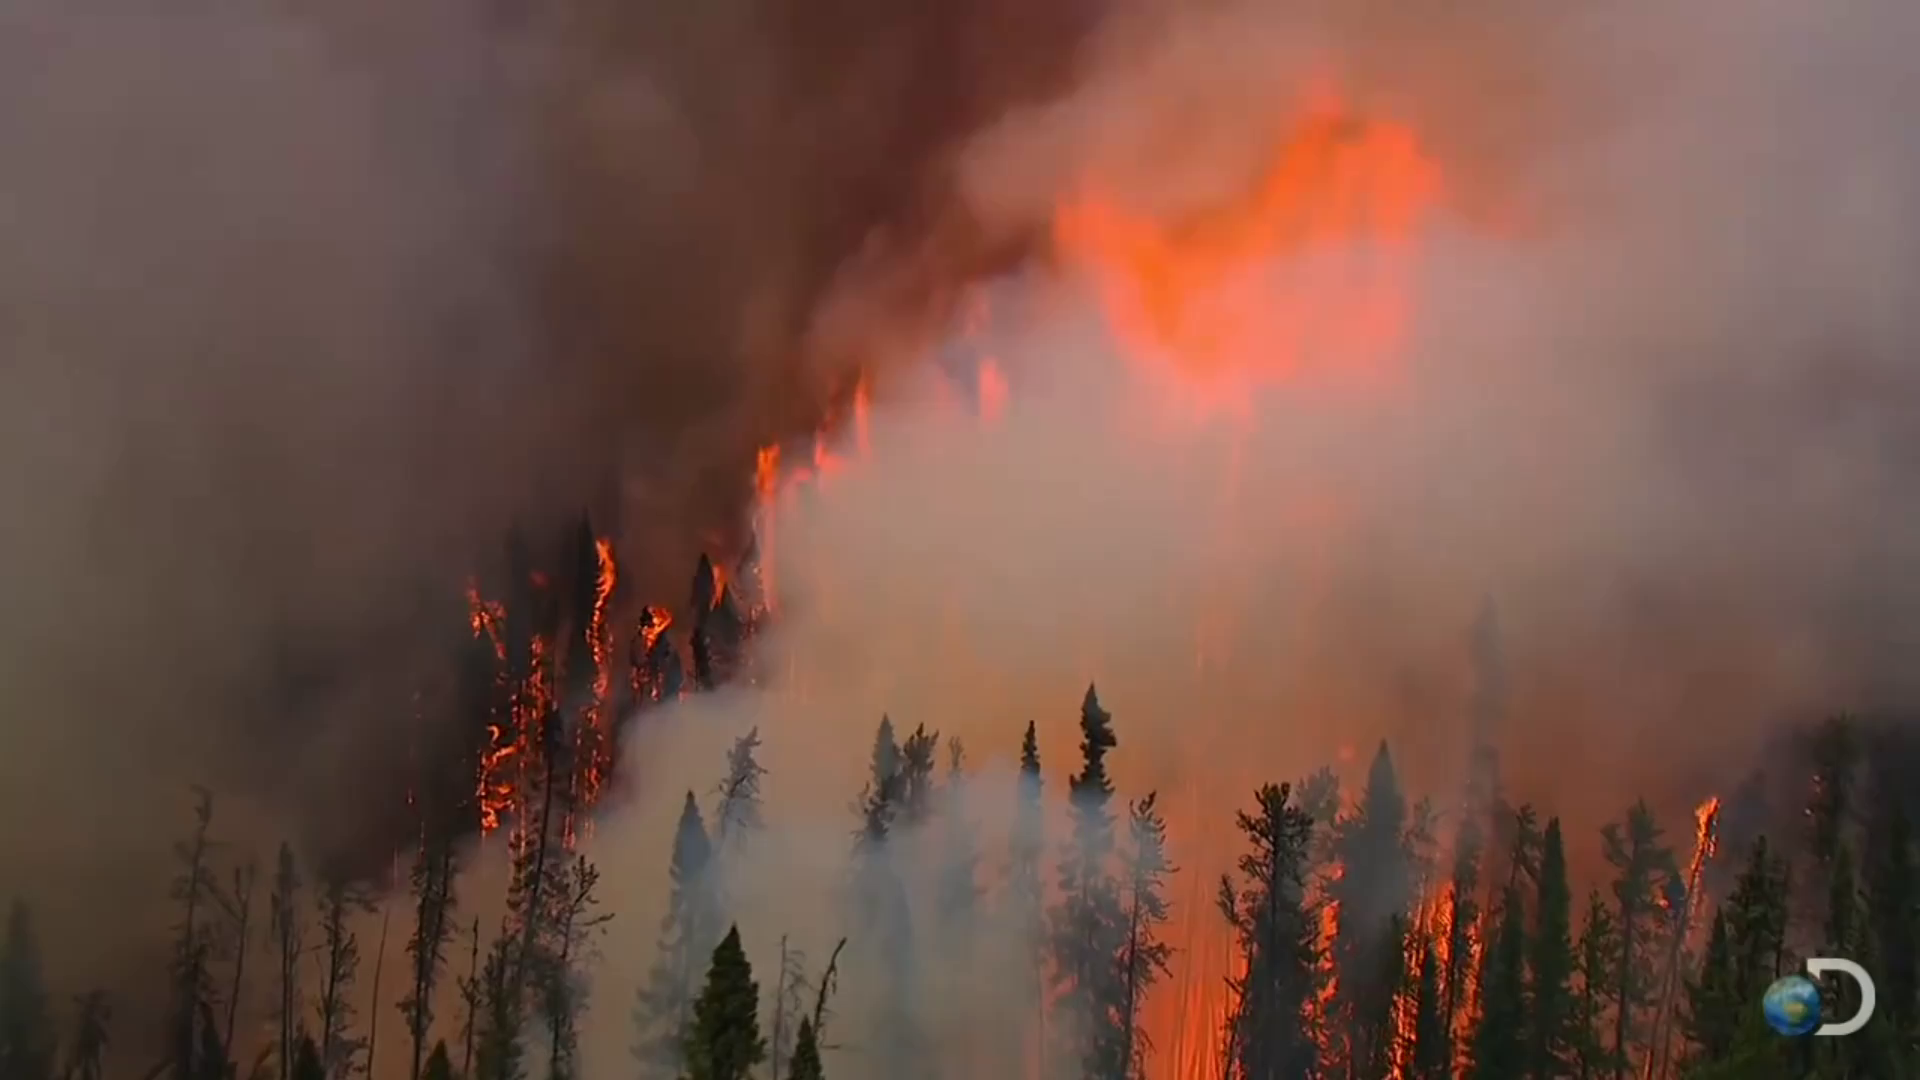

1/1 [==============================] - 0s 150ms/step
Forest fire
SM4d4b849d02bed8beaeeae90a9872dae1
Fire detected
SMS Sent!


In [63]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/ibm/Forest with fire.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("forest1.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()
from twilio.rest import Client
from playsound import playsound
if pred==0:
  account_sid='ACe23d3104e6d355111543395761f7371a'
  auth_token='48801591e5794a1fc8cdd69e928cf77f'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+14254751445',
      #to number
      to='+919080336426')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
